# Analysing Climate Change Tweets

In this project I will analyse a dataset of tweets. The tweets are generally related to the topic of climate change. I will first do some initial analysis on the most retweeted tweets, most popular hashtags and most mentioned users. I will do some keyword correlation analysis. From this I can develop a feel of the popular topics.

After initial analysis I will clean data with regex and nltk libraries and then apply a latent dirichlet allocation machine learning algorithm from the scikit learn library to do some topic modelling.

In [53]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [54]:
df = pd.read_csv('climate_tweets.csv')

df.head()

,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...


# Finding the Most Popular Tweets

Let us look for the most retweeted tweets. We will apply a lambda function to the dataframe to find the keyword 'RT'.

In [55]:
df['retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['retweet'].sum()

#number of retweets

773

In [56]:
df.loc[df['retweet'] == True].tweet.unique().size
#number of unique retweets

677

In [57]:
df.groupby(['tweet']).size().reset_index(name='counts').sort_values('counts',ascending=False).head(10)

#group all repeated tweets by size and then create a count column. Sort top 10 highest counts.

,tweet,counts
3131,No matter if you believe in global warming or ...,20
4555,Take Action @change: Help Protect Wildlife Hab...,14
4027,RT @newtgingrich: Historic snow storm in washi...,9
1765,Fight Climate Change From All Fronts: [link],8
1626,Earth's polar ice sheets vulnerable to even mo...,7
1941,Global Warming Dent's El Ni'o's Protective Shi...,7
1799,Foes of California's global warming law pour m...,6
1351,Coalition of the Tired of Waiting: Fighting Cl...,6
4271,SCIENCE: Scientists explore the evolution of c...,6
1040,Carbon offsets: How a Vatican forest failed to...,6


Let us produce a visualisation of our findings.

In [58]:
counts = df.groupby(['tweet']).size().reset_index(name='counts').counts

In [59]:
bins = np.arange(0, counts.max()+2, 1)-0.5
print(bins)

#set bins

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5]


<function matplotlib.pyplot.show(close=None, block=None)>

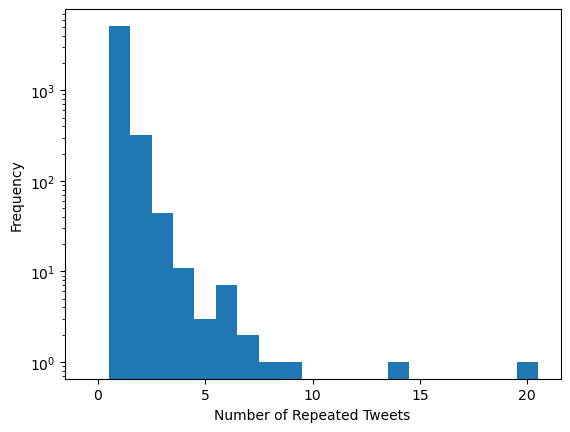

In [60]:
plt.figure()
plt.hist(counts, bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('Number of Repeated Tweets')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show

#plot histogram

# Identifying Who Has the Most Retweets and Most Popular Hashtags

Let us now look for who is being retweeted the most as well as the most popular hashtags. We will use some functions to achieve this.

In [61]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

#functions to extract key information from tweets.

In [62]:
df['retweeted'] = df['tweet'].apply(find_retweeted)
df['mentioned'] = df['tweet'].apply(find_mentioned)
df['hashtags'] = df['tweet'].apply(find_hashtags)

df

,tweet,retweet,retweeted,mentioned,hashtags
0,Global warming report urges governments to act...,False,[],[],[]
1,Fighting poverty and global warming in Africa ...,False,[],[],[]
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[]
...,...,...,...,...,...
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]"
6086,Virginia to Investigate Global Warming Scienti...,False,[],[],[]
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]"
6088,One-Eyed Golfer: Don't dare tell me about glob...,False,[],[],[]


# Keyword Correlations

Let us now find the most mentioned users, most retweeted users and the highest hashtags.

## Hashtags

In [63]:
hashtags_df = df.loc[df['hashtags'].apply(lambda hashtags_list: hashtags_list != []),['hashtags']]

hashtags_df

#remove empty lines

,hashtags
12,"[#Climate, #population]"
16,[#EarthDay]
26,[#ac]
31,[#tcot]
36,"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,..."
...,...
6076,"[#liberalFascism, #News, #tcot]"
6083,[#climate]
6085,"[#p2, #tcot]"
6087,"[#IPCC, #ocra]"


In [64]:
flattened_hashtags_df = pd.DataFrame([hashtag for hashtag_list in hashtags_df['hashtags'] for hashtag in hashtag_list], columns = ['hashtags'])
flattened_hashtags_df

#some lines contain multiple hashtags, we put them all onto one line

,hashtags
0,#Climate
1,#population
2,#EarthDay
3,#ac
4,#tcot
...,...
2062,#IPCC
2063,#ocra
2064,#tcot
2065,#p2


In [65]:
flattened_hashtags_df['hashtags'].unique().size

#number of unique hashtags

477

In [66]:
popular_hashtags = flattened_hashtags_df.groupby(['hashtags']).size().reset_index(name='counts').sort_values('counts', ascending=False).reset_index(drop=True)
popular_hashtags

#most popular hashtags

,hashtags,counts
0,#tcot,227
1,#climate,202
2,#p2,112
3,#green,50
4,#climatechange,47
...,...,...
472,#home,1
473,#hoth,1
474,#houston,1
475,#humanrights,1


<function matplotlib.pyplot.show(close=None, block=None)>

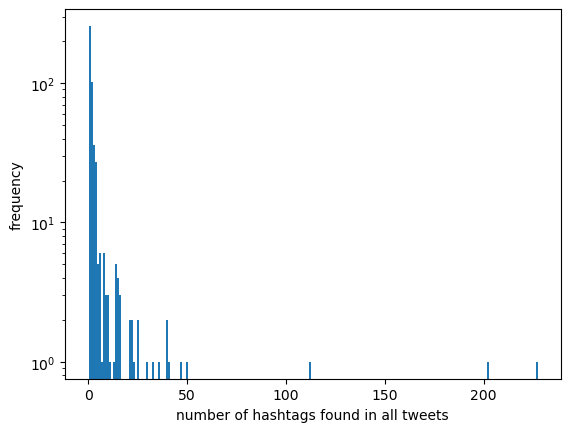

In [67]:
counts = flattened_hashtags_df.groupby(['hashtags']).size().reset_index(name='counts').counts

bins = np.arange(0, counts.max()+2,1)-0.5

plt.figure
plt.hist(counts, bins)

plt.xlabel('number of hashtags found in all tweets')
plt.ylabel('frequency')
plt.yscale('log')
plt.show

From our graph we can see as expected that the majority of the number of repeated hashtags are skewed towards the lower end.

## Most Retweeted User 

Let us repeat the same process as above for the most retweered user.

In [68]:
most_retweeted = df.loc[df['retweeted'].apply(lambda user: user != []),['retweeted']]
most_retweeted

,retweeted
5,"[@sejorg, @JaymiHeimbuch]"
23,[@WGofNYC]
36,[@virgiltexas]
41,[@jazgar]
70,[@redostoneage]
...,...
6058,[@earthvitalsigns]
6068,[@JerryMander]
6072,[@brookedunne]
6076,[@johnnyA99]


In [69]:
most_retweeted_df = pd.DataFrame([user for user_list in most_retweeted['retweeted'] for user in user_list], columns = ['retweeted_user'])
most_retweeted_df

,retweeted_user
0,@sejorg
1,@JaymiHeimbuch
2,@WGofNYC
3,@virgiltexas
4,@jazgar
...,...
961,@earthvitalsigns
962,@JerryMander
963,@brookedunne
964,@johnnyA99


In [70]:
most_retweeted_df['retweeted_user'].unique().size

542

In [71]:
popular_retweeted_users = most_retweeted_df.groupby('retweeted_user').size().reset_index(name='counts').sort_values('counts',ascending=False).reset_index(drop=True)
popular_retweeted_users

,retweeted_user,counts
0,@Drudge_Report,19
1,@Newsweek,18
2,@redostoneage,12
3,@newtgingrich,10
4,@mattyglesias,10
...,...,...
537,@RoseD1st1,1
538,@RosanneMF,1
539,@RightNowLady,1
540,@RickWarren,1


<function matplotlib.pyplot.show(close=None, block=None)>

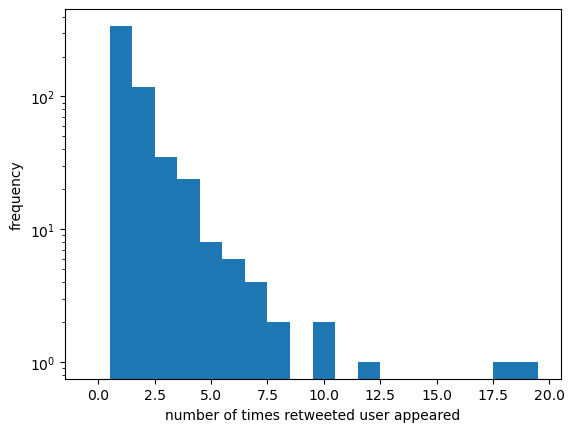

In [72]:
counts = most_retweeted_df.groupby(['retweeted_user']).size().reset_index(name='counts').counts

bins = np.arange(0,counts.max()+2,1)-0.5

plt.figure
plt.hist(counts, bins)
plt.xlabel('number of times retweeted user appeared')
plt.ylabel('frequency')
plt.yscale('log')
plt.show

## Most Mentioned User

In [73]:
mentioned_users = df.loc[df['mentioned'].apply(lambda user: user!=[]), ['mentioned']]
mentioned_users

,mentioned
24,[@GregMitch]
31,[@New_federalists]
42,[@OTOOLEFAN]
64,[@SooperMexican]
69,[@andychrism]
...,...
6028,[@Dr_Rose]
6031,"[@redostoneage, @JulesBeaujolais]"
6037,[@Heritage]
6066,"[@CredoAction, @CourageCampaign]"


In [74]:
flattened_mentioned_users = pd.DataFrame([user for user_list in mentioned_users['mentioned'] for user in user_list], columns = ['mentioned'])
flattened_mentioned_users

,mentioned
0,@GregMitch
1,@New_federalists
2,@OTOOLEFAN
3,@SooperMexican
4,@andychrism
...,...
1168,@JulesBeaujolais
1169,@Heritage
1170,@CredoAction
1171,@CourageCampaign


In [75]:
flattened_mentioned_users['mentioned'].unique().size

766

In [76]:
flattened_mentioned_users.groupby('mentioned').size().reset_index(name='count').sort_values('count',ascending=False).reset_index(drop=True)

,mentioned,count
0,@NewsOnGreen,37
1,@change,33
2,@addthis,19
3,@HumanityNews,17
4,@TIME,9
...,...,...
761,@TelegraphWorld,1
762,@TeriChristoph,1
763,@TerriSueWho,1
764,@ThatKevinSmith,1


<function matplotlib.pyplot.show(close=None, block=None)>

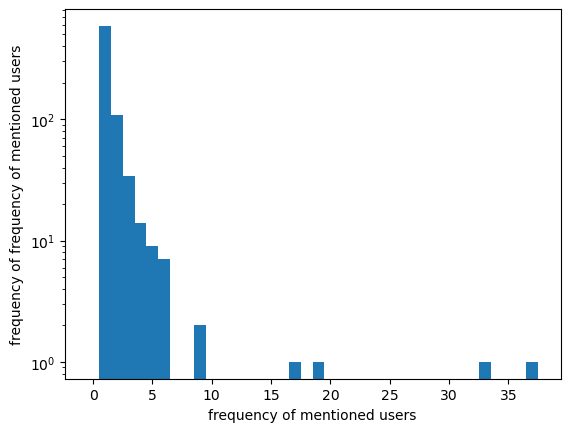

In [77]:
counts_for_fmu = flattened_mentioned_users.groupby(['mentioned']).size().reset_index(name='counts').counts

bins = np.arange(0, counts_for_fmu.max()+2 ,1)-0.5

plt.figure
plt.hist(counts_for_fmu, bins)
plt.xlabel('frequency of mentioned users')
plt.ylabel('frequency of frequency of mentioned users')
plt.yscale('log')
plt.show

# Exploring Correlations Between Hashtags

We will explore in this section which if certain hashtags have correlation to other.

In [78]:
#We will focus only on popular hashtags as hashtags that only appear once will have no correlation with others.

min_appearance = 10

popular_hashtags.loc[popular_hashtags['counts'] >= 10, 'hashtags']
# popular_hashtags[popular_hashtags.counts>=min_appearance]['hashtags']

#find the popular hashtags that appear at least 10 times
popular_hashtags_set = set(popular_hashtags.loc[popular_hashtags['counts'] >= 10, 'hashtags'])

#create a new column of popular hashtags and then drop empty rows
hashtags_df['popular hashtags'] = hashtags_df['hashtags'].apply(lambda hashtag_list: [hashtag for hashtag in hashtag_list if hashtag in popular_hashtags_set])
popular_hashtags_list_df = hashtags_df.loc[hashtags_df['popular hashtags'].apply(lambda hashtags: hashtags != [])]

#vectorise each hashtag so we can manipulate it with a graph
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular hashtags']]

#create new columns for each hashtag in popular hashtag set
#integerise the number of hashtags in hashtag list and apply that to the relevant named column
for hashtag in popular_hashtags_set:
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df['popular hashtags'].apply(lambda hashtag_list: int(hashtag in hashtag_list))

hashtag_vector_df

,popular hashtags,#eco,#news,#global,#SaveTerra,#agw,#EarthDay,#Green,#sgp,#green,...,#IPCC,#fb,#globalwarming,#p2,#teaparty,#energy,#News,#earthday,#Climate,#climatechange
12,[#Climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16,[#EarthDay],0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,[#tcot],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,"[#ocra, #sgp, #gop, #tlot, #p2]",0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
39,"[#tcot, #p2]",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,"[#News, #tcot]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6083,[#climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6085,"[#p2, #tcot]",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6087,"[#IPCC, #ocra]",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [79]:
hashtag_matrix = hashtag_vector_df.drop('popular hashtags', axis=1)

hashtag_matrix

,#eco,#news,#global,#SaveTerra,#agw,#EarthDay,#Green,#sgp,#green,#snowpocalypse,...,#IPCC,#fb,#globalwarming,#p2,#teaparty,#energy,#News,#earthday,#Climate,#climatechange
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6087,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

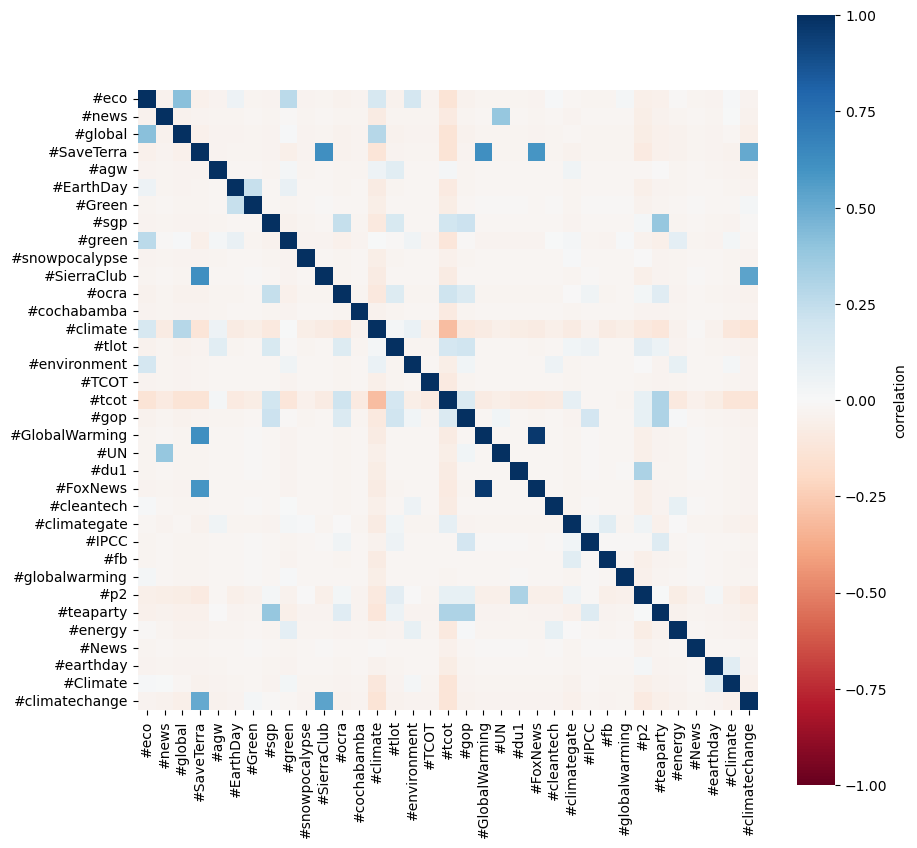

In [80]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()



# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,cmap='RdBu',vmin=-1,vmax=+1,square=True,cbar_kws={'label':'correlation'})
plt.show

# Cleaning Text Data for Topic Modelling

The cleaner the data, the more accurate the predictions. We will use nltk to clean the text of the tweets.

In [81]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hoawen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
#removes links, retweets and mentions

def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [83]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [84]:
df['clean_tweet'] = df.tweet.apply(clean_tweet)

df

,tweet,retweet,retweeted,mentioned,hashtags,clean_tweet
0,Global warming report urges governments to act...,False,[],[],[],global warm report urg govern act brussel belg...
1,Fighting poverty and global warming in Africa ...,False,[],[],[],fight poverti global warm africa
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],carbon offset vatican forest fail reduc global...
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],carbon offset vatican forest fail reduc global...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[],uruguay tool need vulner climat chang
...,...,...,...,...,...,...
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]",phrase global warm abandon favor climat chang...
6086,Virginia to Investigate Global Warming Scienti...,False,[],[],[],virginia investig global warm scientist mann
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]",global warm tube parodi enjoy #ipcc #ocra
6088,One-Eyed Golfer: Don't dare tell me about glob...,False,[],[],[],one eye golfer dare tell global warm twenti fi...


# Topic Modelling

With out text cleaned, we will now turn the text tweets into vectors and then a model.

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf
tf_feature_names

C:\Users\Hoawen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['#climate',
 '#climatechange',
 '#climategate',
 '#earthday',
 '#eco',
 '#energy',
 '#global',
 '#globalwarming',
 '#gop',
 '#green',
 '#news',
 '#ocra',
 '#p',
 '#saveterra',
 '#tcot',
 '#teaparty',
 '#tlot',
 'accord',
 'act',
 'action',
 'activist',
 'address',
 'administr',
 'affect',
 'africa',
 'agenc',
 'ago',
 'agre',
 'air',
 'al',
 'alarmist',
 'allergi',
 'alreadi',
 'america',
 'american',
 'announc',
 'anoth',
 'answer',
 'ap',
 'apr',
 'april',
 'arctic',
 'around',
 'art',
 'articl',
 'ask',
 'attack',
 'author',
 'b',
 'back',
 'bad',
 'believ',
 'better',
 'big',
 'bill',
 'bird',
 'blame',
 'blizzard',
 'blog',
 'bodi',
 'bolivia',
 'book',
 'brilliant',
 'bring',
 'busi',
 'c',
 'california',
 'call',
 'campaign',
 'cap',
 'capit',
 'carbon',
 'care',
 'case',
 'caus',
 'chang',
 'check',
 'china',
 'citi',
 'claim',
 'clean',
 'climat',
 'climateg',
 'clinic',
 'cliniqu',
 'clip',
 'co',
 'coal',
 'coast',
 'cochabamba',
 'cold',
 'collagen',
 'collaps',
 'com',
 '

In [86]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [87]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [88]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [89]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,climat,1220.2,global,666.5,global,1147.2,global,473.1,climat,422.0,global,783.0,chang,666.1,warm,167.9,climat,568.3,climat,529.9
1,chang,1184.5,warm,658.1,warm,1102.1,warm,450.7,chang,401.8,warm,764.7,climat,661.6,#climate,139.2,chang,550.5,chang,520.6
2,via,257.9,snow,160.5,scientist,150.2,believ,101.3,legisl,123.2,gore,137.1,energi,178.8,volcano,128.9,new,321.1,peopl,153.4
3,scienc,112.9,#tcot,121.6,say,87.1,california,87.1,us,105.1,snow,123.7,u,109.8,global,128.6,bill,116.9,world,151.3
4,news,79.5,like,99.0,scienc,71.7,blame,82.1,via,60.5,al,122.1,via,96.5,chang,122.0,senat,106.1,confer,110.1
5,day,77.8,blizzard,90.9,debat,66.6,law,78.6,say,55.9,great,94.1,nation,89.0,help,114.1,agenc,95.1,bill,106.4
6,earth,68.2,dc,86.5,man,61.1,report,77.8,video,55.9,cold,77.1,make,74.5,take,96.8,immigr,77.7,talk,94.8
7,trial,68.1,think,83.3,made,54.0,save,61.8,place,54.1,call,76.5,impact,67.5,climat,76.7,obama,75.6,graham,92.1
8,clinic,68.1,due,80.1,show,51.9,money,56.1,good,52.6,#tcot,75.3,report,63.4,iceland,67.1,feder,67.1,un,77.6
9,carbon,64.5,make,70.4,water,50.6,live,49.3,human,48.2,one,72.1,issu,58.8,could,64.5,via,58.6,put,68.8


From what we can see there are a variety of different topics. Considering topic 1, it indicates a topic related to the blizzards and climate change. The individual analysis of each topics is up to interpretation.